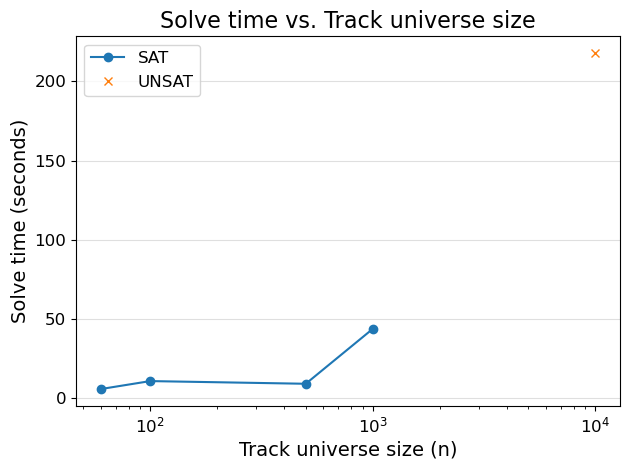

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Path to the CSV file
csv_path = Path("/Users/pkr808/E/Pratik/Spring 2025/CS517/Final_Project/bench_solvetime_vs_n.csv")

# Read the data
df = pd.read_csv(csv_path)

# Separate SAT and UNSAT runs
sat_runs = df[df['returncode'] == 0]
unsat_runs = df[df['returncode'] != 0]

# Create the plot
plt.figure()
# Plot SAT runs
plt.plot(sat_runs['n'], sat_runs['time_sec'], marker='o', linestyle='-', label='SAT')
# Plot UNSAT runs, if any
if not unsat_runs.empty:
    plt.plot(unsat_runs['n'], unsat_runs['time_sec'], marker='x', linestyle='', label='UNSAT')
plt.xscale("log")        # default, just to be explicit
plt.yscale("linear")           # ← log-scale the y-axis
# ── custom fonts ────────────────────────────────────────────
TITLE_F   = 16   # pts
LABEL_F   = 14
TICK_F    = 12
LEGEND_F  = 12
plt.xlabel("Track universe size (n)", fontsize=LABEL_F)
plt.ylabel("Solve time (seconds)", fontsize=LABEL_F)
plt.title("Solve time vs. Track universe size", fontsize=TITLE_F)
plt.grid(True, which="both", axis="y", alpha=0.4)
plt.xticks(fontsize=TICK_F)
plt.yticks(fontsize=TICK_F)
plt.legend(fontsize=LEGEND_F)
plt.tight_layout()

# Save and display the plot
plot_path = "/Users/pkr808/E/Pratik/Spring 2025/CS517/Final_Project/plot_data/solve_time_vs_n.png"
plt.savefig(plot_path, dpi=150)
plt.show()




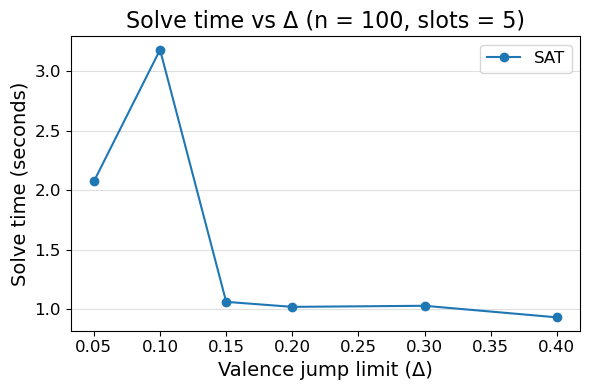

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ── file location ─────────────────────────────────────────────
csv_path = Path("/Users/pkr808/E/Pratik/Spring 2025/CS517/Final_Project/bench_solvetime_vs_delta.csv")
df = pd.read_csv(csv_path)

# ── split SAT / UNSAT (all rows are SAT in your sample) ───────
sat   = df[df["returncode"] == 0]
unsat = df[df["returncode"] != 0]

# ── styling constants ─────────────────────────────────────────
TITLE_F, LABEL_F, TICK_F, LEGEND_F = 16, 14, 12, 12

plt.figure(figsize=(6,4))

plt.plot(sat["val_delta"], sat["time_sec"],
         marker="o", linestyle="-", label="SAT")

if not unsat.empty:                     # none in your CSV, but keep the clause
    plt.plot(unsat["val_delta"], unsat["time_sec"],
             marker="x", linestyle="", label="UNSAT")

# axes, fonts, grid
plt.xlabel("Valence jump limit (Δ)", fontsize=LABEL_F)
plt.ylabel("Solve time (seconds)",    fontsize=LABEL_F)
plt.title("Solve time vs Δ (n = 100, slots = 5)", fontsize=TITLE_F)

plt.xticks(fontsize=TICK_F)
plt.yticks(fontsize=TICK_F)
plt.grid(True, axis="y", alpha=0.4)
plt.legend(fontsize=LEGEND_F)
plt.tight_layout()

# ── save & show ───────────────────────────────────────────────
plot_path = "/Users/pkr808/E/Pratik/Spring 2025/CS517/Final_Project/plot_data/solve_time_vs_delta.png"
plt.savefig(plot_path, dpi=150)
plt.show()


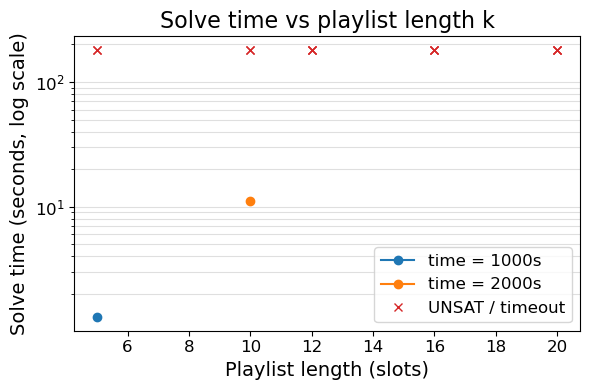

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ── adjust to your path ───────────────────────────────────────
csv_path = Path("/Users/pkr808/E/Pratik/Spring 2025/CS517/Final_Project/bench_solvetime_vs_k.csv")
df = pd.read_csv(csv_path)

# ── split runs ────────────────────────────────────────────────
sat   = df[df["returncode"] == 0]
unsat = df[df["returncode"] != 0]

# ── font constants (same as previous plots) ───────────────────
TITLE_F, LABEL_F, TICK_F, LEGEND_F = 16, 14, 12, 12

plt.figure(figsize=(6,4))

# one line per target duration (column 'time')
for t, grp in sat.groupby("time"):
    plt.plot(grp["slots"], grp["time_sec"],
             marker="o", linestyle="-", label=f"time = {t}s")

# plot UNSAT / timeout points (all have time_sec ≈ 180 s here)
if not unsat.empty:
    plt.plot(unsat["slots"], unsat["time_sec"],
             marker="x", linestyle="", color="tab:red", label="UNSAT / timeout")

plt.yscale("log")
plt.xlabel("Playlist length (slots)",           fontsize=LABEL_F)
plt.ylabel("Solve time (seconds, log scale)",   fontsize=LABEL_F)
plt.title("Solve time vs playlist length k",    fontsize=TITLE_F)

plt.xticks(fontsize=TICK_F)
plt.yticks(fontsize=TICK_F)
plt.grid(True, axis="y", alpha=0.4, which="both")
plt.legend(fontsize=LEGEND_F)
plt.tight_layout()

plot_path = "/Users/pkr808/E/Pratik/Spring 2025/CS517/Final_Project/plot_data/solve_time_vs_k.png"
plt.savefig(plot_path, dpi=150)
plt.show()


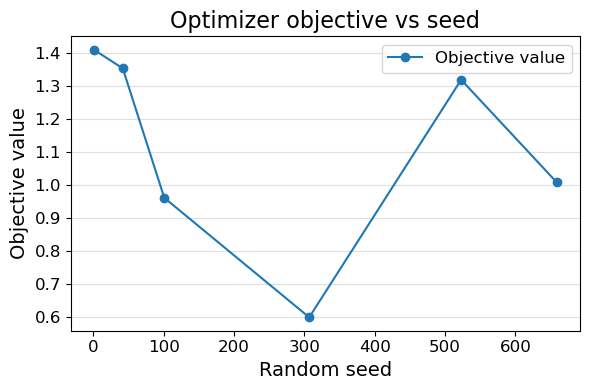

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ── data file ─────────────────────────────────────────────────
csv_path = Path("/Users/pkr808/E/Pratik/Spring 2025/CS517/Final_Project/bench_seedvssetup_final.csv")
df = pd.read_csv(csv_path)

# All runs in this file are SAT (returncode 0); if that ever changes:
sat   = df[df["returncode"] == 0]
unsat = df[df["returncode"] != 0]

# ── font constants (same as before) ───────────────────────────
TITLE_F, LABEL_F, TICK_F, LEGEND_F = 16, 14, 12, 12

plt.figure(figsize=(6,4))

plt.plot(sat["seed"], sat["objective_val"],
         marker="o", linestyle="-", label="Objective value")

if not unsat.empty:
    plt.plot(unsat["seed"], unsat["objective_val"],
             marker="x", linestyle="", color="tab:red", label="UNSAT")

plt.xlabel("Random seed",                fontsize=LABEL_F)
plt.ylabel("Objective value",            fontsize=LABEL_F)
plt.title("Optimizer objective vs seed", fontsize=TITLE_F)

plt.xticks(fontsize=TICK_F)
plt.yticks(fontsize=TICK_F)
plt.grid(True, axis="y", alpha=0.4)
plt.legend(fontsize=LEGEND_F)
plt.tight_layout()

plot_path = "/Users/pkr808/E/Pratik/Spring 2025/CS517/Final_Project/plot_data/objective_vs_seed.png"
plt.savefig(plot_path, dpi=150)
plt.show()


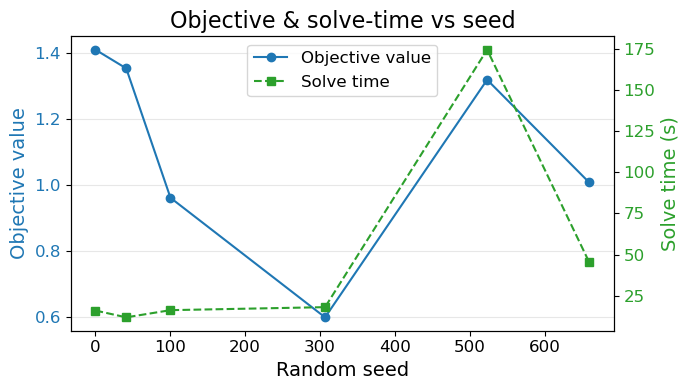

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ── load data ─────────────────────────────────────────────────
csv_path = Path("/Users/pkr808/E/Pratik/Spring 2025/CS517/Final_Project/bench_seedvssetup_final.csv")
df = pd.read_csv(csv_path)

sat   = df[df["returncode"] == 0]
unsat = df[df["returncode"] != 0]

# ── fonts ─────────────────────────────────────────────────────
TITLE_F, LABEL_F, TICK_F, LEGEND_F = 16, 14, 12, 12

fig, ax1 = plt.subplots(figsize=(7,4))

# --- objective value on primary axis -------------------------
ax1.plot(sat["seed"], sat["objective_val"],
         marker="o", linestyle="-",  color="tab:blue",
         label="Objective value")
ax1.set_xlabel("Random seed",       fontsize=LABEL_F)
ax1.set_ylabel("Objective value",   fontsize=LABEL_F, color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue", labelsize=TICK_F)
ax1.tick_params(axis="x", labelsize=TICK_F)

# --- UNSAT objectives (would be NaN usually) -----------------
if not unsat.empty:
    ax1.plot(unsat["seed"], unsat["objective_val"],
             marker="x", linestyle="", color="tab:red", label="UNSAT")

# --- solve-time on secondary axis ----------------------------
ax2 = ax1.twinx()
ax2.plot(sat["seed"], sat["time_sec"],
         marker="s", linestyle="--", color="tab:green",
         label="Solve time")
ax2.set_ylabel("Solve time (s)", fontsize=LABEL_F, color="tab:green")
ax2.tick_params(axis="y", labelcolor="tab:green", labelsize=TICK_F)

if not unsat.empty:
    ax2.plot(unsat["seed"], unsat["time_sec"],
             marker="x", linestyle="", color="tab:red")

# --- legend handling -----------------------------------------
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1+lines2, labels1+labels2, fontsize=LEGEND_F, loc="upper center")

# --- title, grid, save ---------------------------------------
plt.title("Objective & solve-time vs seed", fontsize=TITLE_F)
ax1.grid(True, axis="y", alpha=0.3)
fig.tight_layout()

plot_path = "/Users/pkr808/E/Pratik/Spring 2025/CS517/Final_Project/plot_data/objective_time_vs_seed.png"
plt.savefig(plot_path, dpi=150)
plt.show()
